# Análise Exploratória de Dados (EDA)
Este notebook foca na Análise Exploratória de Dados, que nos ajuda a extrair insights e compreender a distribuição e correlações das nossas variáveis.

**Instruções de Download do Dataset:**
Este notebook utiliza o *Ames Housing Dataset*. Para executá-lo corretamente:
1. Acesse: [House Prices (Kaggle)](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)
2. Baixe os dados e extraia o arquivo `train.csv` na pasta `data/ames_housing/` deste repositório.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. Primeiro aplica o tema do Seaborn
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F9F9F9"})

# 2. DEPOIS altera o rcParams, para que o Seaborn não sobrescreva!
# Força o uso da fonte DejaVu Sans, que tem todos os glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# 3. Definição das cores (Paleta Padrão da Instituição)
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"

# 4. Definição de tamanhos de fonte otimizados para leitura
FONT_LABEL = 20
FONT_TICK = 14
FONT_SUBFIGURE = 26

# 5. Carregamento dos dados
df = pd.read_csv(os.path.join('..', 'data', 'ames_housing', 'train.csv'))


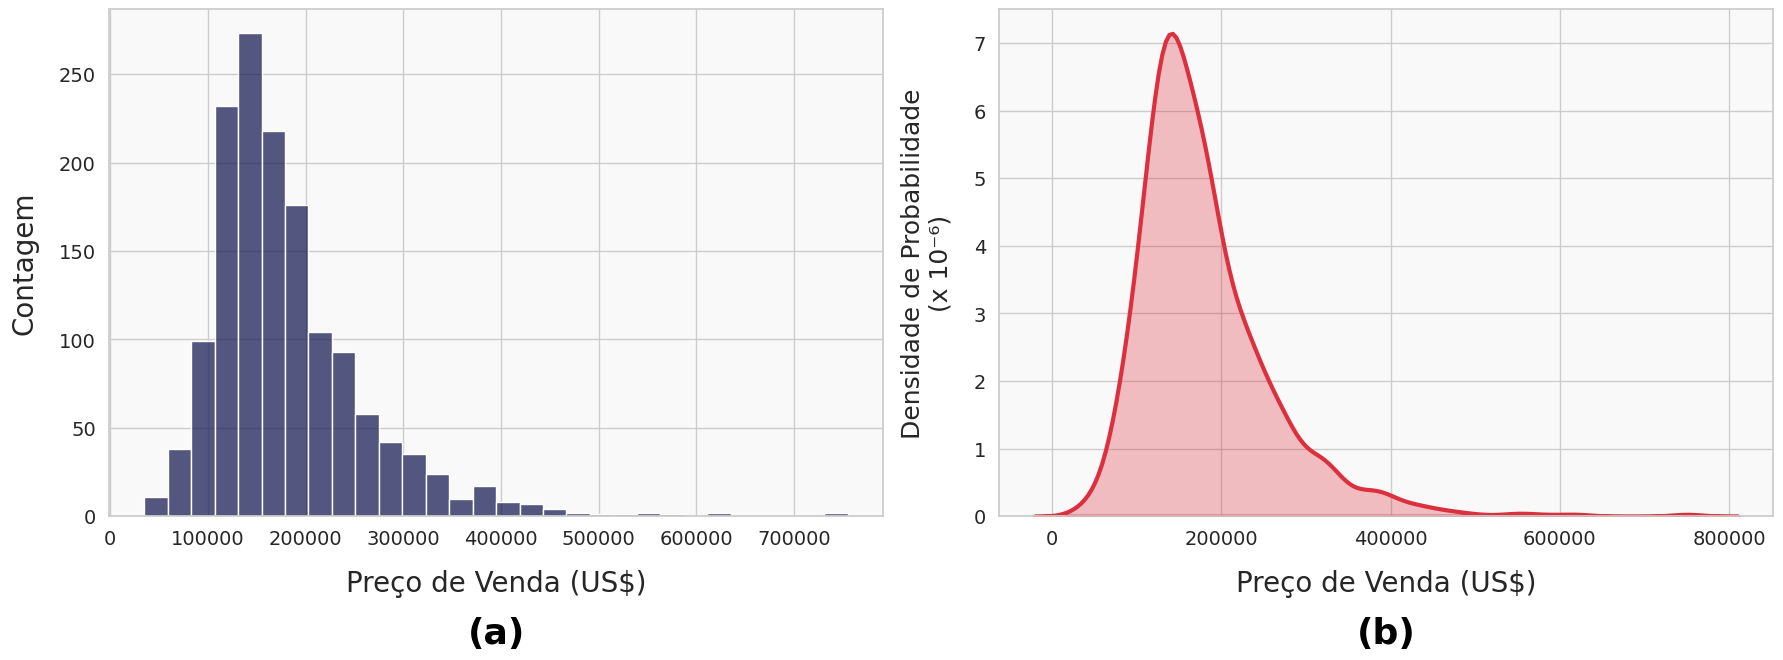

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), facecolor=COR_BRANCO)

# --- (a) O Tradicional: Histograma Básico ---
# O Histograma agrupa os dados de preço em faixas contínuas (bins)
sns.histplot(df['SalePrice'], ax=ax1, color=COR_AZUL_PRINCIPAL, bins=30, alpha=0.7)
ax1.set_xlabel('Preço de Venda (US$)', fontsize=FONT_LABEL, labelpad=15)
ax1.set_ylabel('Contagem', fontsize=FONT_LABEL, labelpad=15)

# --- (b) O Avançado: KDE (Kernel Density Estimation) ---
# O KDE calcula a função de densidade de probabilidade, revelando a curva real dos dados
sns.kdeplot(df['SalePrice'], ax=ax2, color=COR_VERMELHO, fill=True, linewidth=3, alpha=0.3)
ax2.set_xlabel('Preço de Venda (US$)', fontsize=FONT_LABEL, labelpad=15)

# Oculta a notação científica automática e adiciona a informação na label com quebra de linha
ax2.yaxis.get_offset_text().set_visible(False)
ax2.set_ylabel('Densidade de Probabilidade\n(x 10⁻⁶)', fontsize=FONT_LABEL - 2, labelpad=15)

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=FONT_TICK)

# Posiciona as labels (a) e (b) centralizadas dinamicamente em relação aos eixos
ax1.text(0.5, -0.25, '(a)', transform=ax1.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
ax2.text(0.5, -0.25, '(b)', transform=ax2.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')

# Ajusta o layout automaticamente e garante margem inferior para as labels
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)

# Salvamento da imagem
caminho_arquivo = os.path.join('..', 'outputs', 'figures', 'aula_03')
os.makedirs(caminho_arquivo, exist_ok=True) # Garante que a pasta existe
plt.savefig(os.path.join(caminho_arquivo, 'histograma_vs_kde.png'), format='png', dpi=300)

plt.show()

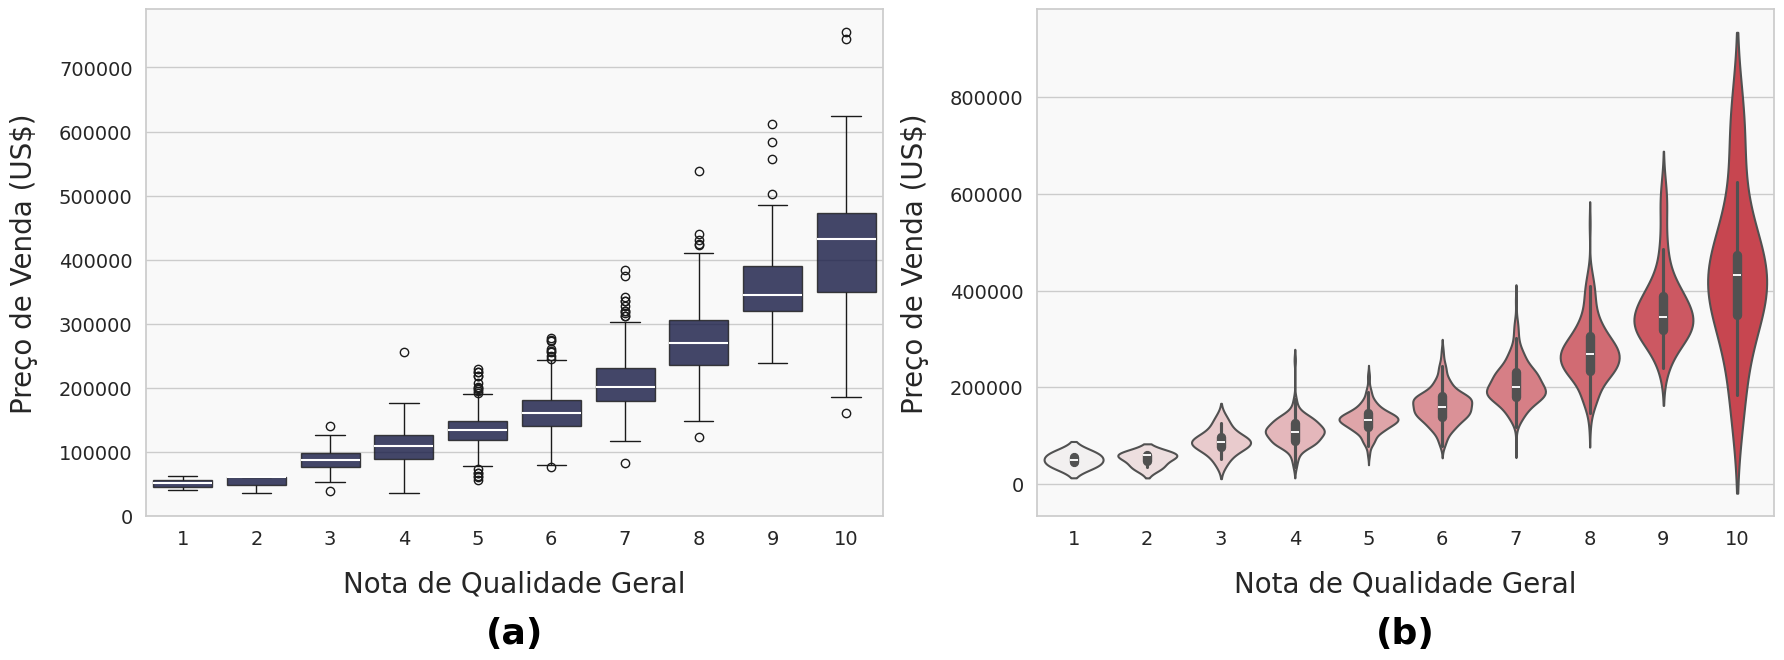

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), facecolor=COR_BRANCO)

# --- (a) O Tradicional: Boxplot ---
# O Boxplot é excelente para visualizar os quartis (25%, 50%, 75%) e mapear outliers
sns.boxplot(
    x='OverallQual', y='SalePrice', data=df, ax=ax1, 
    color=COR_AZUL_PRINCIPAL,
    boxprops=dict(alpha=0.8),
    medianprops=dict(color='white', linewidth=1.5) 
)
ax1.set_xlabel('Nota de Qualidade Geral', fontsize=FONT_LABEL, labelpad=15)
ax1.set_ylabel('Preço de Venda (US$)', fontsize=FONT_LABEL, labelpad=15)

# --- (b) O Avançado: Violin Plot ---
# O Violin Plot combina o Boxplot com o KDE, revelando a densidade interna dos dados (ex: bimodalidades)
sns.violinplot(
    x='OverallQual', y='SalePrice', data=df, ax=ax2, 
    palette=sns.light_palette(COR_VERMELHO, n_colors=10, reverse=False), 
    hue='OverallQual', legend=False, linewidth=1.5
)
ax2.set_xlabel('Nota de Qualidade Geral', fontsize=FONT_LABEL, labelpad=15)
ax2.set_ylabel('Preço de Venda (US$)', fontsize=FONT_LABEL, labelpad=15)

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=FONT_TICK)

# Posiciona as labels (a) e (b) centralizadas dinamicamente em relação aos eixos
ax1.text(0.5, -0.25, '(a)', transform=ax1.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
ax2.text(0.5, -0.25, '(b)', transform=ax2.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')

# Ajusta o layout automaticamente e garante margem inferior para as labels
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)

# Salvamento da imagem
caminho_arquivo = os.path.join('..', 'outputs', 'figures', 'aula_03')
os.makedirs(caminho_arquivo, exist_ok=True) # Garante que a pasta existe
plt.savefig(os.path.join(caminho_arquivo, 'box_vs_violin.png'), format='png', dpi=300)

plt.show()

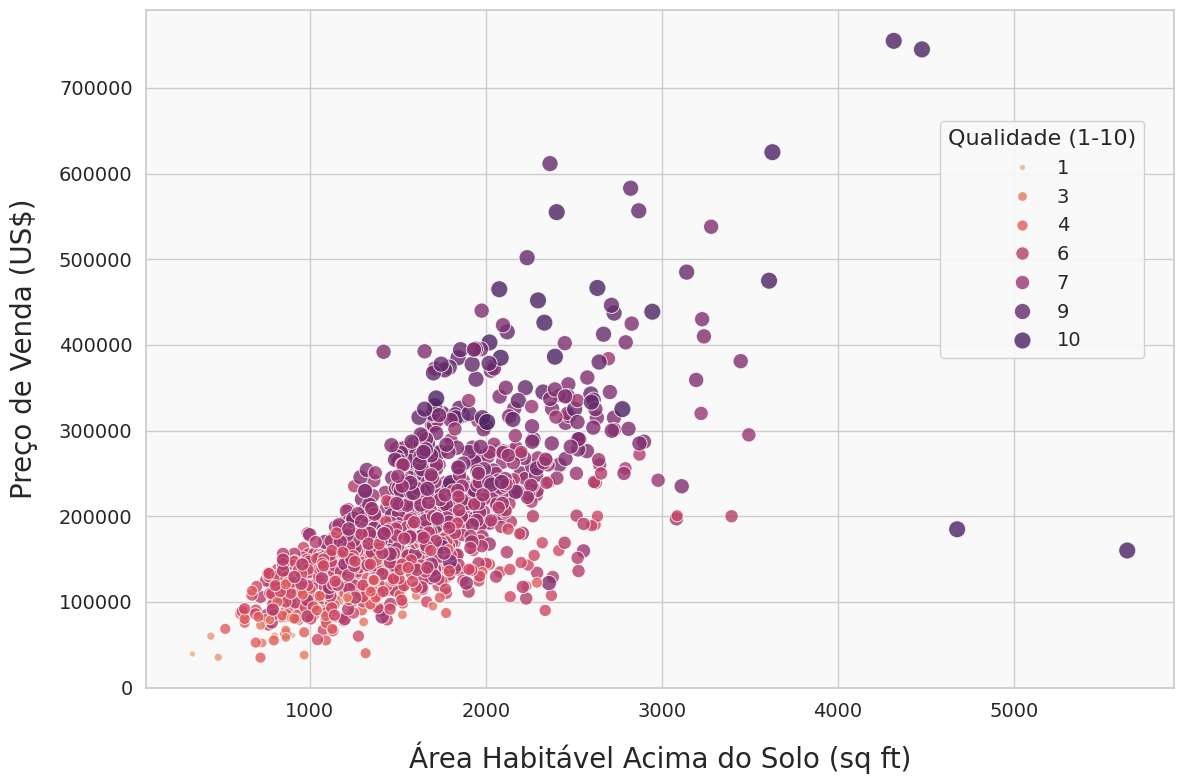

In [4]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor=COR_BRANCO)

# --- Análise Multivariada: Scatterplot ---
# Cruzamento de três dimensões: Eixo X (Área), Eixo Y (Preço) e Cor/Tamanho (Qualidade do Imóvel)
scatter = sns.scatterplot(
    x='GrLivArea', 
    y='SalePrice', 
    hue='OverallQual', 
    palette='flare',
    size='OverallQual',
    sizes=(20, 150),
    data=df, 
    ax=ax,
    alpha=0.8,
    edgecolor="w"
)

ax.set_xlabel('Área Habitável Acima do Solo (sq ft)', fontsize=FONT_LABEL, labelpad=15)
ax.set_ylabel('Preço de Venda (US$)', fontsize=FONT_LABEL, labelpad=15)
ax.tick_params(axis='both', labelsize=FONT_TICK)

# Posiciona a legenda visualmente em uma área vazia do gráfico (ex: canto superior direito dos dados)
plt.legend(
    title='Qualidade (1-10)', 
    title_fontsize=FONT_TICK + 2, 
    fontsize=FONT_TICK, 
    loc='upper right',
    bbox_to_anchor=(0.98, 0.85),
    framealpha=0.9
)

plt.tight_layout()

# Salvamento da imagem
caminho_arquivo = os.path.join('..', 'outputs', 'figures', 'aula_03')
os.makedirs(caminho_arquivo, exist_ok=True) # Garante que a pasta existe
plt.savefig(os.path.join(caminho_arquivo, 'scatter_hue.png'), format='png', dpi=300)

plt.show()

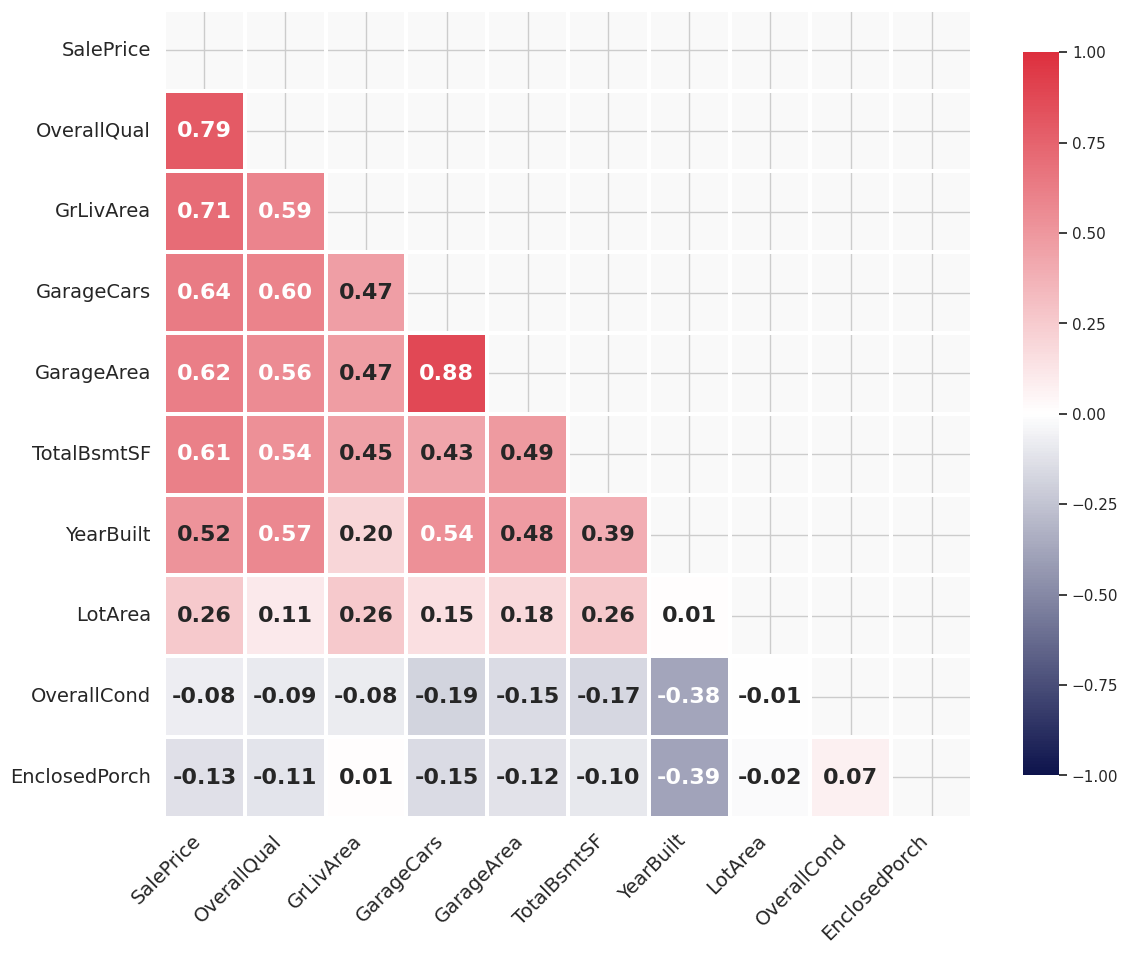

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. Definição das cores (Paleta Padrão da Instituição)
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"

FONT_TICK = 14

# Criação de um mapa de cores divergente personalizado usando a paleta do Gran
# Vai do Azul Principal (Negativo), passando pelo Branco (Neutro), até o Vermelho (Positivo)
cmap_gran = LinearSegmentedColormap.from_list("gran_corr", [COR_AZUL_PRINCIPAL, COR_BRANCO, COR_VERMELHO])

fig, ax = plt.subplots(figsize=(12, 10), facecolor=COR_BRANCO)

# --- Matriz de Correlação ---
cols = [
    'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
    'TotalBsmtSF', 'YearBuilt', 'LotArea', 'OverallCond', 'EnclosedPorch'
]
corrmat = df[cols].corr()

# Criamos uma máscara para esconder o triângulo superior da matriz
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Plotagem do Heatmap
sns.heatmap(
    corrmat, 
    mask=mask, # omitir triangulo superior com máscara
    cmap=cmap_gran, 
    vmax=1.0, 
    vmin=-1.0,
    center=0, 
    annot=True, # Exibe os valores numéricos
    fmt='.2f',  # Formata para duas casas decimais
    square=True, 
    linewidths=1.5, 
    annot_kws={"size": FONT_TICK + 2, "weight": "bold"}, 
    cbar_kws={"shrink": .85}
)

# Formatação dos eixos
ax.tick_params(axis='both', labelsize=FONT_TICK)

# Rotacionar os labels do eixo X em 45 graus para garantir legibilidade
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

# Configuração do caminho do arquivo utilizando os.path.join e armazenamento da imagem
caminho_arquivo = os.path.join('..', 'outputs', 'figures', 'aula_03')
os.makedirs(caminho_arquivo, exist_ok=True) # Garante que a pasta existe
plt.savefig(os.path.join(caminho_arquivo, 'heatmap_correlacao.png'), format='png', dpi=300)

plt.show()